# Purpose
Here, we intend to verify that the 1-spingroup Encore algorithms converges to the 2-spingroup Encore algorithms when the one spingroup is very infrequent (i.e. low level-density).

# Importing Modules

In [1]:
import sys
sys.path.append('../')

import TAZ

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=9, linewidth=130)

In [2]:
%matplotlib widget

# WigBayes Test

#### Defining Mean Parameters

In [3]:
eps = 0.005 # ...

# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron

# Mean Parameters:
EB = (1e-5,5000)
pM    = [0.12547, 0.14404]
false_dens = 1.0/6.0
lvl_dens = [(1-eps)/4.3166, eps/4.3166]
gn2m  = [44.11355, 33.38697]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

# 2 Spingroup Case:
SGs = TAZ.Spingroup.zip(l, j)
reaction2 = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

# 1 Spingroup Case:
SGs = TAZ.Spingroup.zip(l[:1], j[:1])
reaction1 = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens[:1], gn2m=gn2m[:1], nDOF=dfn[:1], gg2m=gg2m[:1], gDOF=dfg[:1], spingroups=SGs, EB=EB, false_dens=false_dens)

#### Sampler

In [4]:
Res, Types, Missed_Res, Missed_Types = reaction2.sample()

#### Running 1-Spingroup WigBayes

In [5]:
Prior, TPPrior = TAZ.PTBayes(Res, reaction1)
distributions = reaction1.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction1.EB, distributions, reaction1.false_dens, Prior, TPPrior)
Posterior_1 = runMaster.WigBayes(verbose=True)

Preparing level-spacings
Finished level-spacing calculations

In calculating the total probability ("TP"), there was a percent error of 1.222%.
This exceeds the set limit of 1.000%. This error could be attributed to a bug or
numerical instability.

Finished CP calculation
Finished WigBayes calculation


#### Running 2-Spingroup WigBayes

In [6]:
Prior, TPPrior = TAZ.PTBayes(Res, reaction2)
distributions = reaction2.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction1.EB, distributions, reaction1.false_dens, Prior, TPPrior)
Posterior_2 = runMaster.WigBayes(verbose=True)

Preparing level-spacings
Finished level-spacing calculations



In calculating the total probability ("TP"), there was a percent error of 1.242%.
This exceeds the set limit of 1.000%. This error could be attributed to a bug or
numerical instability.

Finished CP calculation
Finished WigBayes calculation


### Comparison

Average Error for True Probability  = 0.00161
Average Error for False Probability = 0.00191



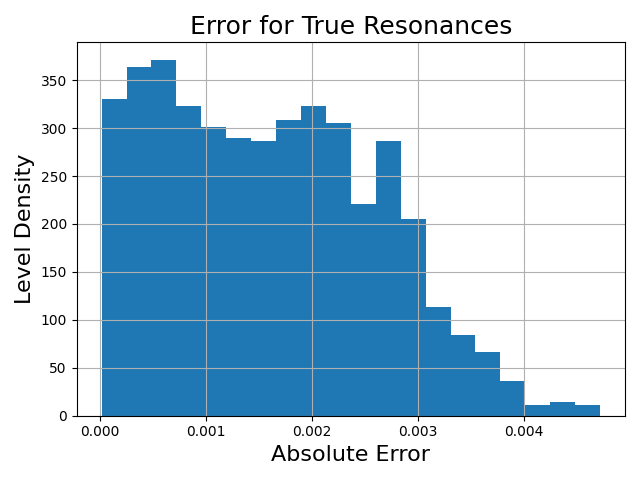

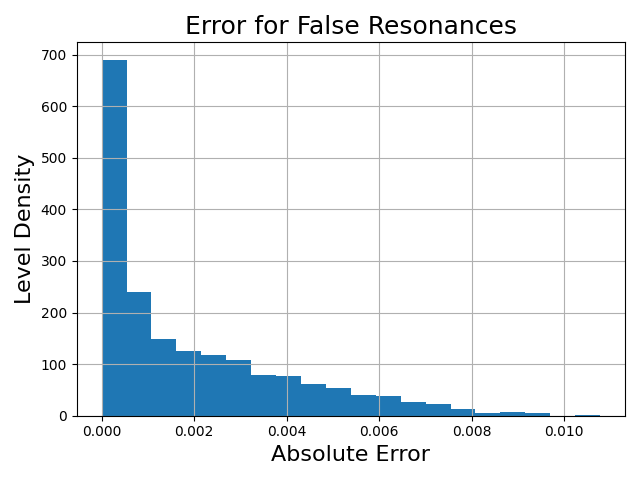

In [7]:
abs_err_true  = abs(Posterior_2[:,0] - Posterior_1[:,0])
abs_err_false = abs(Posterior_2[:,2] - Posterior_1[:,1])

average_err_true  = np.mean(abs_err_true)
average_err_false = np.mean(abs_err_false)

print(f'Average Error for True Probability  = {average_err_true:.5f}')
print(f'Average Error for False Probability = {average_err_false:.5f}')
print()

plt.figure(1)
plt.clf()
plt.hist(abs_err_true, bins=20, density=True)
plt.grid()
plt.title('Error for True Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(2)
plt.clf()
plt.hist(abs_err_false, bins=20, density=True)
plt.grid()
plt.title('Error for False Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.tight_layout()
plt.show()

### Comparing Posteriors:

In [8]:
print('True Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,:1], Posterior_2[:,:1]), axis=1))
print()
print('False Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,1:], Posterior_2[:,2:]), axis=1))

True Spingroup Posterior:
[[0.984084 0.98392 ]
 [0.940371 0.939804]
 [0.818766 0.817583]
 [0.919573 0.919132]
 [0.828699 0.826933]
 [0.96974  0.969441]
 [0.742082 0.74233 ]
 [0.525832 0.523191]
 [0.617975 0.617146]
 ...
 [0.83352  0.832287]
 [0.755336 0.753528]
 [0.728904 0.727068]
 [0.881731 0.881096]
 [0.931841 0.931082]
 [0.838151 0.836826]
 [0.884345 0.883181]
 [0.910858 0.910084]
 [0.989436 0.989292]]

False Spingroup Posterior:
[[0.015916 0.015812]
 [0.059629 0.05939 ]
 [0.181234 0.180499]
 [0.080427 0.079972]
 [0.171301 0.170856]
 [0.03026  0.030219]
 [0.257918 0.25566 ]
 [0.474168 0.470642]
 [0.382025 0.379581]
 ...
 [0.16648  0.165828]
 [0.244664 0.243427]
 [0.271096 0.269793]
 [0.118269 0.117836]
 [0.068159 0.068126]
 [0.161849 0.161387]
 [0.115655 0.115435]
 [0.089142 0.089047]
 [0.010564 0.010662]]
